In [1]:
#import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
#Read the data 
df = pd.read_excel('UMD Alumni Association Dataset.xlsx', sheet_name=None)

C:\Anaconda3\lib\site-packages\openpyxl\worksheet\_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


In [3]:
#Filter columns and rows that are relevent 
df_all = pd.concat([df['2019-20'], df['2018-19'], df['2017-18'], df['2016-17'], df['2015-16'], df['2014-15'], df['2013-14']])
df_partial = pd.concat([df['2019-20'], df['2018-19'], df['2017-18'], df['2016-17'], df['2015-16'], df['2014-15']])

-- Exploratory data analysis on numerical data --

In [4]:
#Overall statistics
df_all.describe()

,Participated,Average Age,First Time Attendees,Percentage First Time Attendees,Major Prospects,Percentage Major Prospect
count,622.000000,622.000000,622.000000,622.000000,622.000000,622.000000
mean,44.803859,40.117363,13.456592,0.276282,5.966238,0.102214
std,93.165049,9.741459,41.103936,0.242273,14.123466,0.131444
min,1.000000,19.000000,0.000000,0.000000,0.000000,0.000000
25%,10.000000,33.000000,1.000000,0.068523,0.000000,0.000000
50%,20.000000,40.000000,4.000000,0.237327,1.000000,0.058824
75%,44.750000,46.000000,11.000000,0.444444,5.000000,0.166667
max,1657.000000,75.000000,702.000000,1.000000,131.000000,0.818182


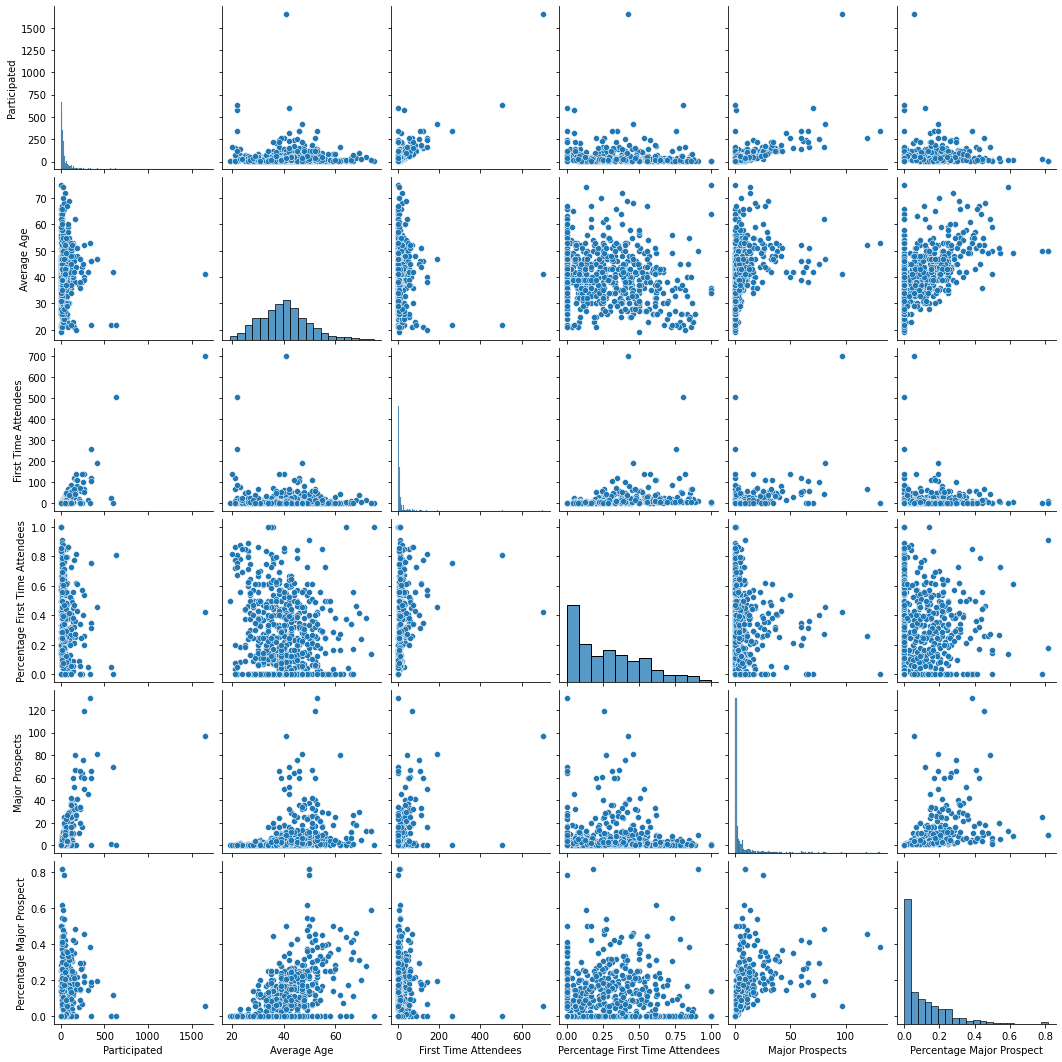

In [5]:
#Find correlation and distribution 
'''
1. Percentage major prospect is highly correlated to average age.
2. Participated does not highly correlated to either percentage first time attendees or percentage major prospect.
3. Percentage major prospect & percentage first time attendees does not highly correlated, 
   so increasing or decreasing in one does not necessarily affect the other!
   This is important because it means it is possible to increase both of them at the same time without conflict!
'''
sns.pairplot(df_all)
plt.show()

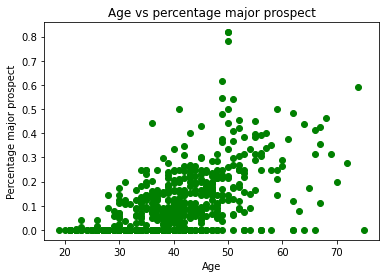

In [6]:
#linear relationship between Average Age and percentage major prospect
plt.scatter(df_all['Average Age'], df_all['Percentage Major Prospect'], color='g')
plt.title('Age vs percentage major prospect')
plt.xlabel('Age')
plt.ylabel('Percentage major prospect')
plt.show()

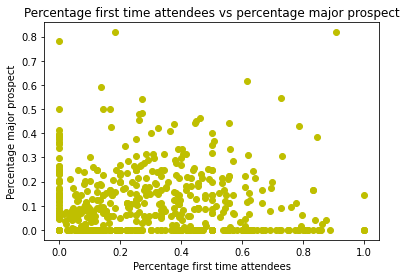

In [7]:
#Percentage major prospect & percentage first time attendees does not highly correlated
plt.scatter(df_all['Percentage First Time Attendees'], df_all['Percentage Major Prospect'], color='y')
plt.title('Percentage first time attendees vs percentage major prospect')
plt.xlabel('Percentage first time attendees')
plt.ylabel('Percentage major prospect')
plt.show()

-- Exploratory data analysis on time series --

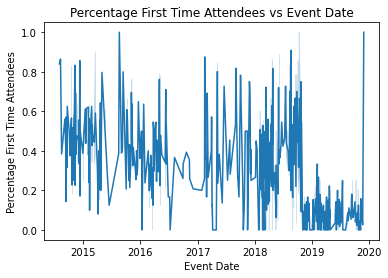

In [8]:
#How percentage first time attendees change through out the time
sns.lineplot(x="Event Date", y="Percentage First Time Attendees", data=df_partial)
plt.title('Percentage First Time Attendees vs Event Date')
plt.show()

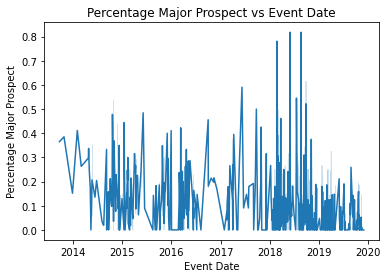

In [9]:
#How percentage major prospect change through out the time
sns.lineplot(x="Event Date", y="Percentage Major Prospect", data=df_all)
plt.title('Percentage Major Prospect vs Event Date')
plt.show()

In [10]:
#Adding column year
df_partial['year'] = pd.DatetimeIndex(df_partial['Event Date']).year
df_all['year'] = pd.DatetimeIndex(df_all['Event Date']).year

In [11]:
#Adding column month
df_partial['month'] = pd.DatetimeIndex(df_partial['Event Date']).month
df_all['month'] = pd.DatetimeIndex(df_all['Event Date']).month

In [12]:
#Adding column weekday 
import calendar
df_all['weekday'] = pd.DatetimeIndex(df_all['Event Date']).dayofweek
for i in range(len(df_all['weekday'])):
    df_all.iloc[i,16] = calendar.day_name[df_all.iloc[i,16]]
df_partial['weekday'] = pd.DatetimeIndex(df_partial['Event Date']).dayofweek
for i in range(len(df_partial['weekday'])):
    df_partial.iloc[i,16] = calendar.day_name[df_partial.iloc[i,16]]

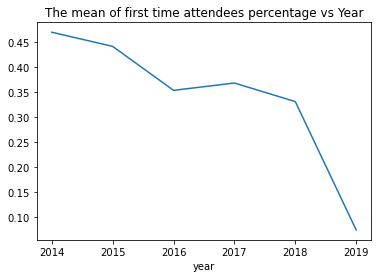

In [13]:
#Percentage first time attendees by year
'''
Concerning downward trend.
'''
df_partial.groupby('year')['Percentage First Time Attendees'].mean().plot()
plt.title('The mean of first time attendees percentage vs Year')
plt.show()

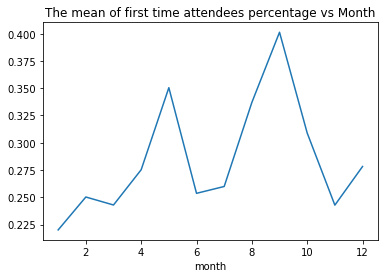

In [14]:
#Percentage first time attendees by month
'''
May and September have the highest percentage first time attendees!
January, March and November have the lowest percentage first time attendees!
The difference is over 10% which is significant.
'''
df_partial.groupby('month')['Percentage First Time Attendees'].mean().plot()
plt.title('The mean of first time attendees percentage vs Month')
plt.show()

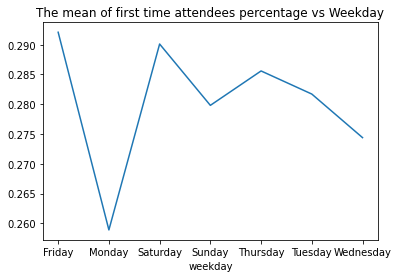

In [15]:
#Percentage first time attendees by weekday
'''
Friday and Saturday have the highest percentage first time attendees!
Monday has the lowest percentage first time attendees!
But the difference is only 3% which is not significant.
'''
df_partial.groupby('weekday')['Percentage First Time Attendees'].mean().plot()
plt.title('The mean of first time attendees percentage vs Weekday')
plt.show()

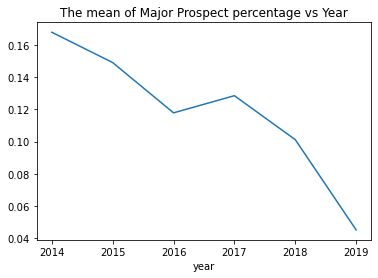

In [16]:
#Percentage major prospect by year
'''
Concerning downward trend.
'''
df_partial.groupby('year')['Percentage Major Prospect'].mean().plot()
plt.title('The mean of Major Prospect percentage vs Year')
plt.show()

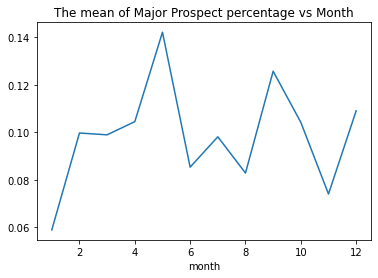

In [17]:
#Percentage major prospect by month
'''
May and September also have the highest percentage major prospect!
January and November have the lowest percentage major prospect!
The difference is about 8%.
'''
df_partial.groupby('month')['Percentage Major Prospect'].mean().plot()
plt.title('The mean of Major Prospect percentage vs Month')
plt.show()

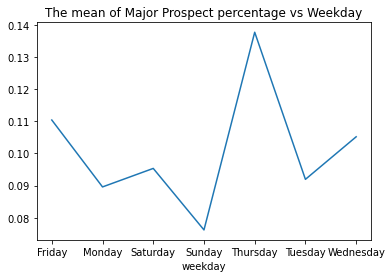

In [18]:
#Percentage major prospect by weekday
'''
Thursday has the highest percentage major prospect!
Sunday has the lowest percentage major prospect!
The difference is about 6%.
'''
df_all.groupby('weekday')['Percentage Major Prospect'].mean().plot()
plt.title('The mean of Major Prospect percentage vs Weekday')
plt.show()

-- Exploratory data analysis on categorical data --

In [19]:
#Statistics of Percentage First Time Attendees
df_partial['Percentage First Time Attendees'].describe()

count    608.000000
mean       0.282644
std        0.241348
min        0.000000
25%        0.076923
50%        0.250000
75%        0.451136
max        1.000000
Name: Percentage First Time Attendees, dtype: float64

In [20]:
#How many unique values 
df_partial[['Activity Code', 'Location Code', 'Group Code']].nunique()

Activity Code    337
Location Code     45
Group Code        49
dtype: int64

In [21]:
#Statistics of Percentage Major Prospect
df_all['Percentage Major Prospect'].describe()

count    622.000000
mean       0.102214
std        0.131444
min        0.000000
25%        0.000000
50%        0.058824
75%        0.166667
max        0.818182
Name: Percentage Major Prospect, dtype: float64

In [22]:
#How many unique values 
df_all[['Activity Code', 'Location Code', 'Group Code']].nunique()

Activity Code    341
Location Code     45
Group Code        49
dtype: int64

Analyzing percentage first time attendees

In [23]:
#Statistics of Mean Percentage First Time Attendees by location
df_partial.groupby('Location Code').mean()['Percentage First Time Attendees'].describe()

count    45.000000
mean      0.302475
std       0.170805
min       0.000000
25%       0.224716
50%       0.272172
75%       0.340746
max       0.818182
Name: Percentage First Time Attendees, dtype: float64

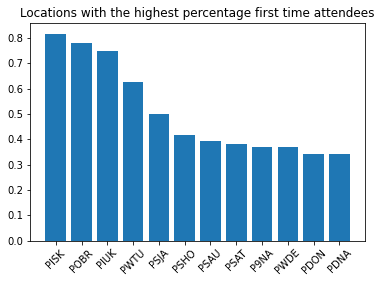

In [24]:
#Locations with the highest percentage first time attendees (Greater than 75 percentile)
loc_pfta_top_value = df_partial.groupby('Location Code').mean().query('`Percentage First Time Attendees`>0.340746')['Percentage First Time Attendees'].sort_values(ascending=False)
loc_pfta_top_index = loc_pfta_top_value.index
plt.bar(loc_pfta_top_index, loc_pfta_top_value)
plt.title('Locations with the highest percentage first time attendees')
plt.xticks(rotation=45)
plt.show()

In [25]:
#Location Description for the Location Codes above
x = 0
for l in loc_pfta_top_index:
    x += 1 
    print(x, df_partial[df_partial['Location Code']==l]['Location Description'].unique())

1 ['CP International- South Korea']
2 ['CP Online-Brazen']
3 ['CP International- UK']
4 ['CP West Coast-Tucson']
5 ['CP Southeast-Jacksonville']
6 ['CP Southeast-Houston' 'CP Southeast- Houston']
7 ['CP Southeast- Austin']
8 ['CP Southeast-Atlanta' 'CP Southeast- Atlanta']
9 ['CP USA- General']
10 ['CP West Coast-Denver' 'CP West Coast- Denver']
11 ['CP DMV-On Campus' 'CP Social-General' 'CP DMV- On Campus'
 'CP DMV- On Campus ']
12 ['CP DMV-General' 'CP DMV- General ' 'CP DMV- General']


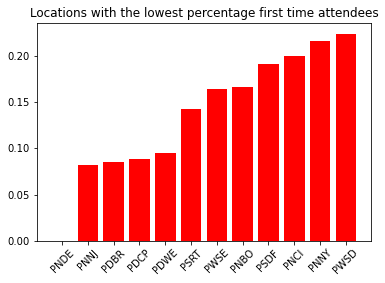

In [26]:
#Locations with the lowest percentage first time attendees (Lower than 25 percentile)
loc_pfta_bot_value = df_partial.groupby('Location Code').mean().query('`Percentage First Time Attendees`<0.224716')['Percentage First Time Attendees'].sort_values()
loc_pfta_bot_index = loc_pfta_bot_value.index
plt.bar(loc_pfta_bot_index, loc_pfta_bot_value, color='r')
plt.title('Locations with the lowest percentage first time attendees')
plt.xticks(rotation=45)
plt.show()

In [27]:
#Location Description for the Location Codes above
x = 0
for l in loc_pfta_bot_index:
    x += 1
    print(x, df_partial[df_partial['Location Code']==l]['Location Description'].unique())

1 ['CP Northeast-Delaware']
2 ['CP Northeast-NNJ' 'CP Northeast- NNJ']
3 ['CP DMV-Blue Ridge' 'CP DMV- Blue Ridge ']
4 ['CP DMV-Greater CP']
5 ['CP DMV-Western MD']
6 ['CP Southeast- Charlotte']
7 ['CP West Coast-Seattle' 'CP West-Seattle' 'CP West Coast- Seattle '
 'CP West Coast- Seattle']
8 ['CP Northeast-Boston' 'CP Northeast- Boston' 'CP Northeast- Boston ']
9 ['CP Southeast-Dallas/Forth Worth' 'CP Southeast-Dallas/Fort Worth'
 'CP Southeast- Dallas/Fort Worth']
10 ['CP Northeast-Cincinnati']
11 ['CP Northeast-New York' 'CP Northeast- New York'
 'CP Northeast- New York ' 'CP Norhteast- New York']
12 ['CP West-San Diego' 'CP West Coast-San Diego' 'CP West Coast- San Diego ']


In [28]:
#Statistics of Mean Percentage First Time Attendees by group
df_partial.groupby('Group Code').mean()['Percentage First Time Attendees'].describe()

count    49.000000
mean      0.321324
std       0.185495
min       0.025641
25%       0.200000
50%       0.275785
75%       0.428571
max       0.800000
Name: Percentage First Time Attendees, dtype: float64

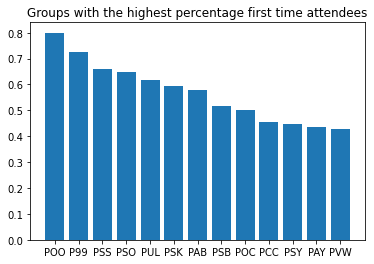

In [29]:
#Groups with the highest percentage first time attendees (Greater than 75 percentile)
grp_pfta_top_value = df_partial.groupby('Group Code').mean().query('`Percentage First Time Attendees`>0.428571')['Percentage First Time Attendees'].sort_values(ascending=False)
grp_pfta_top_index = grp_pfta_top_value.index
plt.bar(grp_pfta_top_index, grp_pfta_top_value)
plt.title('Groups with the highest percentage first time attendees')
plt.show()

In [30]:
#Group Description for the Group Codes above
x = 0
for g in grp_pfta_top_index:
    x += 1
    print(x, df_partial[df_partial['Group Code']==g]['Group Description'].unique())

1 ['CP Service- Muslim']
2 ['CP Social-General' 'CP General-General']
3 ['CP Social-Students' 'CP Social- Students ' 'CP Social- Students']
4 ['CP Service- MAM']
5 ['CP Cultural- Latino']
6 ['CP Social- Lambda']
7 ['CP Athletics-UMBA' 'CP Athletics- UMBA']
8 ['CP Social- UMBA']
9 ['CP Service- CIVICUS']
10 ['CP ProDev- CIVICUS']
11 ['CP Social-RG' 'CP Social- Young Alumni']
12 ['CP Athletics-RG']
13 ['CP D&I-Alumnae']


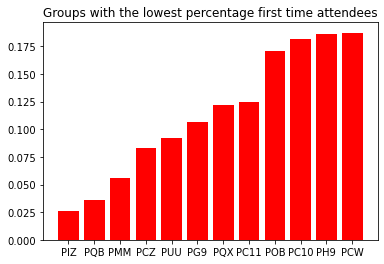

In [31]:
#Groups with the lowest percentage first time attendees (Lower than 25 percentile)
grp_pfta_bot_value = df_partial.groupby('Group Code').mean().query('`Percentage First Time Attendees`<0.200000')['Percentage First Time Attendees'].sort_values()
grp_pfta_bot_index = grp_pfta_bot_value.index
plt.bar(grp_pfta_bot_index, grp_pfta_bot_value, color='r')
plt.title('Groups with the lowest percentage first time attendees')
plt.show()

In [32]:
#Group Description for the Group Codes above
x = 0
for g in grp_pfta_bot_index:
    x += 1
    print(x, df_partial[df_partial['Group Code']==g]['Group Description'].unique())

1 ['CP Cultivation-StuAlum']
2 ['CP Affinity-Black Alumni' 'CP Affiniy-Black Alumni']
3 ['CP Membership-Membership']
4 ['CP ProDev-StuAlum']
5 ['CP Cultural-Jewish']
6 ['CP Campaign-General']
7 ['CP Affinity-Band']
8 ['CP ProDev- General']
9 ['CP Service-UMBA' 'CP Service- UMBA']
10 ['CP ProDev- General']
11 ['CP Stewardship-General' 'CP Stewardship- General'
 'CP Stewarship- General']
12 ['CP Pro Dev-Alumnae' 'CP ProDev-Alumnae' 'CP ProDev- Alumnae']


Analyzing percentage major prospect

In [33]:
#Statistics of Mean Percentage Major Prospect by location
df_all.groupby('Location Code').mean()['Percentage Major Prospect'].describe()

count    45.000000
mean      0.108606
std       0.090978
min       0.000000
25%       0.038501
50%       0.100504
75%       0.152679
max       0.318182
Name: Percentage Major Prospect, dtype: float64

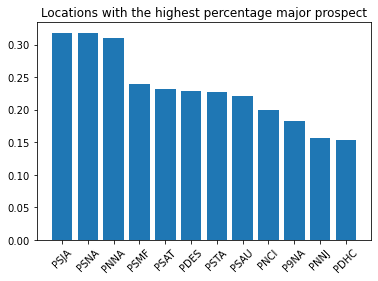

In [34]:
#Locations with the highest percentage major prospect (Greater than 75 percentile)
loc_pmp_top_value = df_all.groupby('Location Code').mean().query('`Percentage Major Prospect`>0.152679')['Percentage Major Prospect'].sort_values(ascending=False)
loc_pmp_top_index = loc_pmp_top_value.index
plt.bar(loc_pmp_top_index, loc_pmp_top_value)
plt.title('Locations with the highest percentage major prospect')
plt.xticks(rotation=45)
plt.show()

In [35]:
#Location Description for the Location Codes above
x = 0
for l in loc_pmp_top_index:
    x += 1
    print(x, df_all[df_all['Location Code']==l]['Location Description'].unique())

1 ['CP Southeast-Jacksonville']
2 ['CP Southeast-General' 'CP Southeast- General']
3 ['CP Northeast-General' 'CP Northeast- General']
4 ['CP Southeast-South Florida' 'CP Southeast- South Florida '
 'CP Southeast- South Florida' 'CP Southeast- Fort Lauderdale']
5 ['CP Southeast-Atlanta' 'CP Southeast- Atlanta']
6 ['CP DMV-Eastern Shore' 'CP DMV- Eastern Shore']
7 ['CP Southeast-Tampa/Sarasota' 'CP Southeast- Tampa/Sarasota'
 'CP Southeast- Tampa' 'CP Southeast- Tampa ']
8 ['CP Southeast- Austin']
9 ['CP Northeast-Cincinnati']
10 ['CP USA- General']
11 ['CP Northeast-NNJ' 'CP Northeast- NNJ']
12 ['CP DMV-Howard County' 'CP DMV- Howard County']


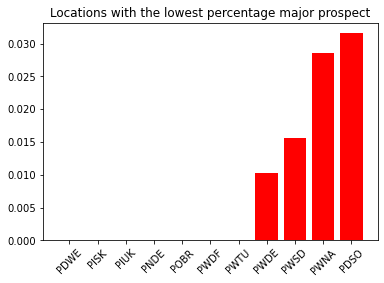

In [36]:
#Locations with the lowest percentage major prospect (Lower than 25 percentile)
loc_pmp_bot_value = df_all.groupby('Location Code').mean().query('`Percentage Major Prospect`<0.038501')['Percentage Major Prospect'].sort_values()
loc_pmp_bot_index = loc_pmp_bot_value.index
plt.bar(loc_pmp_bot_index, loc_pmp_bot_value, color='r')
plt.title('Locations with the lowest percentage major prospect')
plt.xticks(rotation=45)
plt.show()

In [37]:
#Location Description for the Location Codes above
x = 0
for l in loc_pmp_bot_index:
    x += 1
    print(x, df_all[df_all['Location Code']==l]['Location Description'].unique())

1 ['CP DMV-Western MD']
2 ['CP International- South Korea']
3 ['CP International- UK']
4 ['CP Northeast-Delaware']
5 ['CP Online-Brazen']
6 ['CP West Coast-Dallas/Fort Worth' 'CP West- Dallas/Fort Worth']
7 ['CP West Coast-Tucson']
8 ['CP West Coast-Denver' 'CP West Coast- Denver']
9 ['CP West-San Diego' 'CP West Coast-San Diego' 'CP West Coast- San Diego ']
10 ['CP West Coast-General' 'CP West Coast- General']
11 ['CP DMV-Southern MD' 'CP DMV-Southern Maryland' 'CP DMV- Southern MD']


In [38]:
#Statistics of Mean Percentage Major Prospect by group
df_all.groupby('Group Code').mean()['Percentage Major Prospect'].describe()

count    49.000000
mean      0.087050
std       0.092165
min       0.000000
25%       0.000000
50%       0.074405
75%       0.141519
max       0.319656
Name: Percentage Major Prospect, dtype: float64

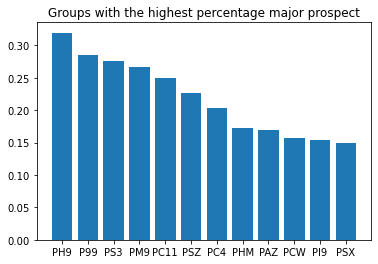

In [39]:
#Groups with the highest percentage major prospect (Greater than 75 percentile)
grp_pmp_top_value = df_all.groupby('Group Code').mean().query('`Percentage Major Prospect`>0.141519')['Percentage Major Prospect'].sort_values(ascending=False)
grp_pmp_top_index = grp_pmp_top_value.index
plt.bar(grp_pmp_top_index, grp_pmp_top_value)
plt.title('Groups with the highest percentage major prospect')
plt.show()

In [40]:
#Group Description for the Group Codes above
x = 0
for g in grp_pmp_top_index:
    x += 1
    print(x, df_all[df_all['Group Code']==g]['Group Description'].unique())

1 ['CP Stewardship-General' 'CP Stewardship- General'
 'CP Stewarship- General']
2 ['CP Social-General' 'CP General-General']
3 ['CP Social- Emeriti' 'CP Social- Emiriti ']
4 ['CP Membership- General']
5 ['CP ProDev- General']
6 ['CP Social-StuAlum' 'CP Social- StuAlum']
7 ['CP ProDev-Mid Career' 'CP ProDev- Mid Career']
8 ['CP Stewardship-Membership' 'CP Stewardship- Membership'
 'CP Stewardship- Membership ']
9 ['CP Athletics-Students & Alumni']
10 ['CP Pro Dev-Alumnae' 'CP ProDev-Alumnae' 'CP ProDev- Alumnae']
11 ['CP Cultivation-General' 'CP Cultivation- General'
 'CP Cultivation- General ']
12 ['CP Social- Band']


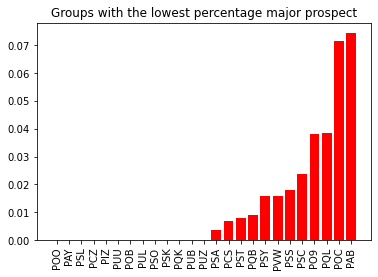

In [41]:
#Groups with the lowest percentage major prospect (Lower than 50 percentile)
grp_pmp_bot_value = df_all.groupby('Group Code').mean().query('`Percentage Major Prospect`<0.074405')['Percentage Major Prospect'].sort_values()
grp_pmp_bot_index = grp_pmp_bot_value.index
plt.bar(grp_pmp_bot_index, grp_pmp_bot_value, color='r')
plt.xticks(rotation = 'vertical')
plt.title('Groups with the lowest percentage major prospect')
plt.show()

In [42]:
#Group Description for the Group Codes above
x = 0
for g in grp_pmp_bot_index:
    x += 1
    print(x, df_all[df_all['Group Code']==g]['Group Description'].unique())

1 ['CP Service- Muslim']
2 ['CP Athletics-RG']
3 ['CP Social-Latino' 'CP Social- Latino']
4 ['CP ProDev-StuAlum']
5 ['CP Cultivation-StuAlum']
6 ['CP Cultural-Jewish']
7 ['CP Service-UMBA' 'CP Service- UMBA']
8 ['CP Cultural- Latino']
9 ['CP Service- MAM']
10 ['CP Social- Lambda']
11 ['CP Affinity-Lambda']
12 ['CP Cultural-UMBA' 'CP Cultural- UMBA']
13 ['CP Cultural- StuAlum']
14 ['CP Social-Asian Pacific' 'CP Social- Asian Pacific '
 'CP Social- Asian Pacific']
15 ['CP Career-Student' 'CP ProDev-Students' 'CP ProDev- Students'
 'CP ProDev- Students ']
16 ['CP Social-Terp Thon' 'CP Social- Terp Thon' 'CP Social- Terp Thon ']
17 ['CP Affinity-Black Alumni' 'CP Affiniy-Black Alumni']
18 ['CP Social-RG' 'CP Social- Young Alumni']
19 ['CP D&I-Alumnae']
20 ['CP Social-Students' 'CP Social- Students ' 'CP Social- Students']
21 ['CP Social-CIVICUS' 'CP Social- CIVICUS']
22 ['CP Service-General' 'CP Service- General']
23 ['CP Affinity-Latino']
24 ['CP Service- CIVICUS']
25 ['CP Athletics-UMBA'

-- Further analysis on categorical data --

In [43]:
#Function that returns a category based on location code
def cat_loc(code):
    if code == 'PDON':
        return 'On Campus'
    elif 'PD' in code:
        return 'DMV'
    elif 'PO' in code:
        return 'Online'
    elif 'PN' in code:
        return 'NorthEast'
    elif 'PS' in code:
        return 'SouthEast'
    elif 'PW' in code:
        return 'West Coast'
    else:
        return 'International'

In [44]:
#Add new column Location
df_all['Location'] = df_all['Location Code'].apply(cat_loc)
df_partial['Location'] = df_partial['Location Code'].apply(cat_loc)

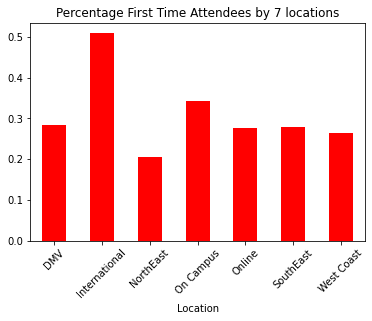

In [45]:
#Percentage First Time Attendees by 7 locations
'''
International event has the highest average percentage first time attendees!
On campus event comes second and NorthEast event has the least.
The difference is about 30% which is significant!
'''
data=df_partial.groupby('Location')['Percentage First Time Attendees'].mean().plot.bar(color='r')
plt.title('Percentage First Time Attendees by 7 locations')
plt.xticks(rotation=45)
plt.show()

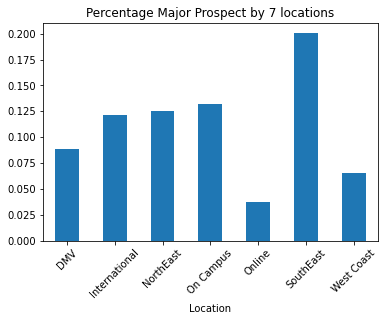

In [46]:
#Percentage Major Prospect by 7 locations
'''
SouthEast event has the highest average percentage major prospect.
Online and West Coast events have the least.
The difference is about 16% which is significant!
'''
df_all.groupby('Location')['Percentage Major Prospect'].mean().plot.bar()
plt.title('Percentage Major Prospect by 7 locations')
plt.xticks(rotation=45)
plt.show()

In [47]:
#Function that returns a category based on group code
def cat_group(code):
    if 'PA' in code:
        return 'Athletics'
    elif ('PS' in code and code != 'PSO') or code == 'P99':
        return 'Social'
    elif 'PC' in code:
        return 'ProDev'
    else:
        return 'Others'

In [48]:
#Add new column Group 
df_all['Group'] = df_all['Group Code'].apply(cat_group)
df_partial['Group'] = df_partial['Group Code'].apply(cat_group)

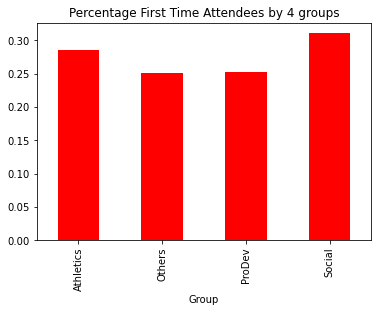

In [49]:
#Percentage First Time Attendees by 4 groups
'''
Social event has the highest average percentage first time attendees!
Others and ProDev have the lowest!
The difference is about 6%.
'''
df_partial.groupby('Group')['Percentage First Time Attendees'].mean().plot.bar(color='r')
plt.title('Percentage First Time Attendees by 4 groups')
plt.show()

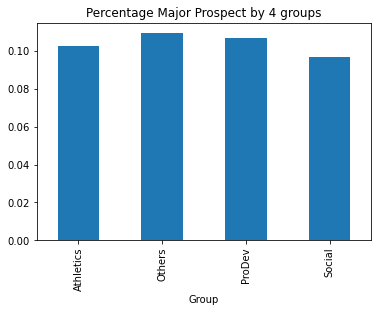

In [50]:
#Percentage Major Prospect by 4 groups
'''
Other event has the highest average percentage major prospect.
Social event has the least.
But the difference is only about 1% which is not significant. 
'''
df_all.groupby('Group')['Percentage Major Prospect'].mean().plot.bar()
plt.title('Percentage Major Prospect by 4 groups')
plt.show()

In [51]:
#Function that returns a activity type based on activity description
def cat_act(des):
    if 'CP AAE' in des:
        return 'AAE'
    elif 'CP AA' in des:
        return 'AA'
    elif 'CP SALC' in des:
        return 'SALC'
    elif 'CP Dinner' in des:
        return 'Dinner'

In [52]:
#Add new column Activity Type
df_all['Activity Type'] = df_all['Activity Description'].apply(cat_act)
df_partial['Activity Type'] = df_partial['Activity Description'].apply(cat_act)

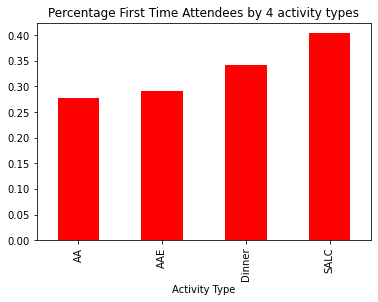

In [53]:
#Percentage First Time Attendees by 4 activity types
'''
SALC event has the highest average percentage first time attendees!
AA and AAE event have the lowest!
The difference is about 12% which is significant!
'''
df_partial.groupby('Activity Type')['Percentage First Time Attendees'].mean().plot.bar(color='r')
plt.title('Percentage First Time Attendees by 4 activity types')
plt.show()

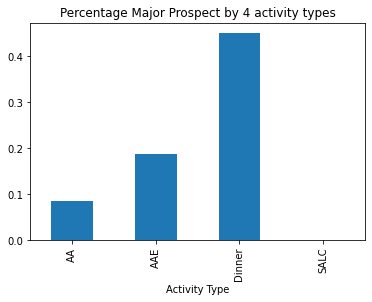

In [54]:
#Percentage Major Prospect by 4 activity types
'''
Dinner event has the highest average percentage major prospect.
SALC and AA event has the least.
Thedifference is about 35% to 45% which is extremely significant. 
'''
df_all.groupby('Activity Type')['Percentage Major Prospect'].mean().plot.bar()
plt.title('Percentage Major Prospect by 4 activity types')
plt.show()

--Predictive Model Building--

In [55]:
#import required libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

In [56]:
#Select relevant variables
num_col_partial = ['Participated', 'Average Age', 'year']
cat_col_partial = ['Location', 'month', 'Group', 'Activity Type']

num_col_all = ['Participated', 'Average Age', 'year']
cat_col_all = ['Location', 'month', 'weekday', 'Activity Type']
#Split the data into training and testing
X_partial = df_partial[num_col_partial+cat_col_partial]
y_partial = df_partial['Percentage First Time Attendees']
X_partial_train, X_partial_test, y_partial_train, y_partial_test = train_test_split(
    X_partial, y_partial, test_size=0.33, random_state=30)

X_all = df_all[num_col_all+cat_col_all]
y_all = df_all['Percentage Major Prospect']
X_all_train, X_all_test, y_all_train, y_all_test = train_test_split(
    X_all, y_all, test_size=0.3, random_state=30)

In [57]:
#Convert categorical data into dummy variables
OH_encoder1 = OneHotEncoder(sparse=False, drop='first')
OH_partial_train = pd.DataFrame(OH_encoder1.fit_transform(X_partial_train[cat_col_partial]))
OH_partial_test = pd.DataFrame(OH_encoder1.transform(X_partial_test[cat_col_partial]))
OH_encoder2 = OneHotEncoder(sparse=False, drop='first')
OH_all_train = pd.DataFrame(OH_encoder2.fit_transform(X_all_train[cat_col_all]))
OH_all_test = pd.DataFrame(OH_encoder2.transform(X_all_test[cat_col_all]))

OH_partial_train.index = X_partial_train.index
OH_partial_test.index = X_partial_test.index
OH_all_train.index = X_all_train.index
OH_all_test.index = X_all_test.index

In [58]:
#Combine the converted categorical data with numerical data
X_partial_train_ready = pd.concat([X_partial_train[num_col_partial], OH_partial_train], axis=1)
X_partial_test_ready = pd.concat([X_partial_test[num_col_partial], OH_partial_test], axis=1)
X_all_train_ready = pd.concat([X_all_train[num_col_all], OH_all_train], axis=1)
X_all_test_ready = pd.concat([X_all_test[num_col_all], OH_all_test], axis=1)

In [59]:
#Build and train the models
lm_pfta = LinearRegression()
lm_pfta.fit(X_partial_train_ready, y_partial_train)
pfta_predict = lm_pfta.predict(X_partial_test_ready)

lm_pmp = LinearRegression()
lm_pmp.fit(X_all_train_ready, y_all_train)
pmp_predict = lm_pmp.predict(X_all_test_ready)

In [60]:
#Evaluate the models
print(mean_absolute_error(y_partial_test, pfta_predict))
print(mean_absolute_error(y_all_test, pmp_predict))

0.1608802980340907
0.07118346518650222
